**Importaciones**

In [10]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Carga del conjunto de datos**

In [2]:
fmnist = keras.datasets.fashion_mnist

**División de entrenamiento y prueba**

In [3]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


**Visualización de una muestra**

Label: 8
Image: [[  0   0   0   0   0   0   0   0   0   1   0   0  18 107 119 103   9   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  99 155 113  61 118 173 117   0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0 110 136   0   0   0   0   0 167 159   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   6   0  72 147   0   0   5   0   2   0   0 174 118   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   1   5   0   0 174   4   0   4   0   0   0   0   0   0 204  44   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   8   0 125 128   0   9   0   0   0   0   0   2   0 107 152   0   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184   9   0   4   0   0   0   0   0   2   0   0 190   0   0   2   0   0   0   0]
 [  0   0   0   1   0   2   0  73 158   0   0   0   0   1   0   0   0   0   4   0 157  79   0   3   1   0   0   0]
 [  0   0   2   5   1   0   0 157  98   0   2   0   0   1   0   

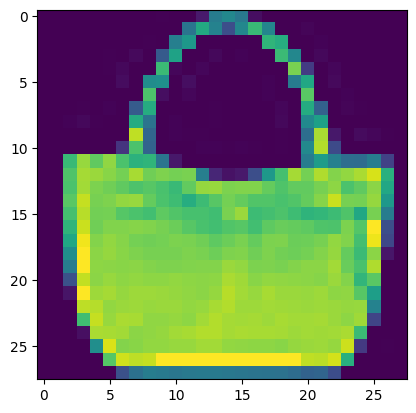

In [4]:
index = 100
np.set_printoptions(linewidth=320)
print(f'Label: {training_labels[index]}')
print(f'Image: {training_images[index]}')
plt.imshow(training_images[index])

**Normalización de los datos**

In [5]:
training_images = training_images / 255.0
test_images = test_images / 255.0

**Construcción del modelo**

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

**Compilación del modelo**

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Entrenamiento del modelo**

In [8]:
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5047 - accuracy: 0.8221
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3783 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3399 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3158 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2994 - accuracy: 0.8895
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2833 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2706 - accuracy: 0.8993
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2598 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2500 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.24

**Gráfica del historial de entrenamiento**

<Axes: >

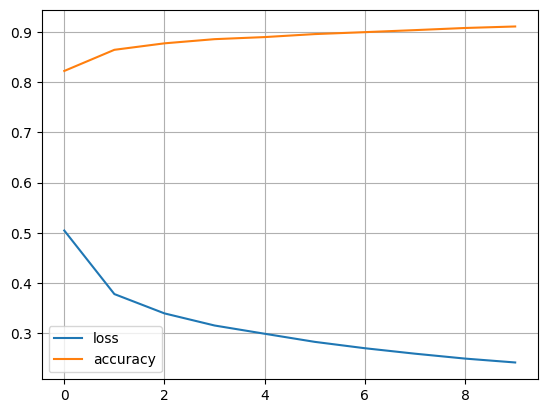

In [11]:
pd.DataFrame(history.history).plot(grid=True)

**Evaluación del modelo**

In [12]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Perdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3270 - accuracy: 0.8834
Perdida en el conjunto de prueba: 0.3270319104194641
Precisión en el conjunto de prueba: 0.883400022983551


Predicción de una muestra

In [13]:
index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification:\n {classification.reshape(-1, 1)}')

Label: 2
1/1 [==============================] - 0s 142ms/step
Classification:
 [[1.8377015e-05]
 [8.6114632e-16]
 [9.9745840e-01]
 [2.6199605e-11]
 [1.8869280e-03]
 [1.6827626e-11]
 [6.3624879e-04]
 [2.3678965e-13]
 [5.9189993e-11]
 [1.7250899e-13]]
